In [1]:
!pip install cx_oracle

In [2]:
import cx_Oracle
dsn = cx_Oracle.makedsn('localhost',1521,'xe')
dsn

'(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))'

In [3]:
db = cx_Oracle.connect('C##CAKD5','CAKD5',dsn)
db

<cx_Oracle.Connection to C##CAKD5@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))>

In [4]:
import pandas as pd
cursor = db.cursor()
cursor.execute('select * from book')
x = cursor.fetchall()
columns = ['BOOKID','BOOKNAME','PUBLISHER','PRICE']
df = pd.DataFrame(x,columns=columns)
df.head()

,BOOKID,BOOKNAME,PUBLISHER,PRICE
0,1,축구의 역사,굿스포츠,7000
1,2,축구아는 여자,나무수,13000
2,3,축구의 이해,대한미디어,22000
3,4,골프 바이블,대한미디어,35000
4,5,피겨 교본,굿스포츠,8000


In [5]:
# create
import cx_Oracle
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'create table sample1(id varchar2(10), score number)'
# 생성하고 닫고
cursor.execute(sql)
cursor.close()
# 반영하고 문장닫고
con.commit()
con.close()

In [6]:
# insert - execute 하나만 넣기
def insert(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample1(id, score) values(:1,:2)'
    # 생성하고 닫고
    cursor.execute(sql,t)
    cursor.close()
    # 반영하고 문장닫고
    con.commit()
    con.close()
insert(('111',80))

In [11]:
# insert - many 여러개 넣기
rows =[('112',90),('113',70),('114',75),('115',80),('116',85)]
def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample1(id, score) values(:1,:2)'
    # 생성하고 닫고
    cursor.executemany(sql,t)
    cursor.close()
    # 반영하고 문장닫고
    con.commit()
    con.close()
insertmany(rows)

In [1]:
# 3개의 속성으로 구성되는 테이블 sample2를 생성하고 10개의 데이터를 입력
# col에 제약조건 설정
# create
import cx_Oracle
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'create table sample2(col01 varchar2(10), col02 number, col03 number,constraint player_pk primary key(col01))'
# 생성하고 닫고
cursor.execute(sql)
cursor.close()
# 반영하고 문장닫고
con.commit()
con.close()

In [3]:
# insert - many 여러개 넣기
def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample2(col01, col02,col03) values(:1,:2,:3)'
    # 생성하고 닫고
    cursor.executemany(sql,t)
    cursor.close()
    # 반영하고 문장닫고
    con.commit()
    con.close()

In [4]:
# 첫번째 col01에 기본키 제약조건을 걸어서 col01의 내용은ㅇ 중복이 되면 안됨
rows =[('1',90,1),('2',70,3),('3',75,10),('4',80,5),('5',85,87),
      ('10',90,1),('9',70,3),('8',75,10),('7',80,5),('6',85,87)]

insertmany(rows)

In [5]:
# update 
def updatecol(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = 'update sample2 set col03 = :1 where col01 = :2'
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
updatecol(('3','1')) # col01이 1일때 col03을 3으로 바꿔라

In [15]:
# delete
def deletecol(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = 'delete from sample2 where col01 = :1'
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
deletecol(('10',)) # col01의 값이 10인 애들을 전부 삭제 , tuple 형식은 한개를 넣을때는 ,를 붙여야된다.

In [21]:
import pandas as pd
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'select * from sample2'
cursor.execute(sql)
x = cursor.fetchall()
df_col = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = 'SAMPLE2'") # 샘플 대문자로 넣어주세요
col = cursor.fetchall() # 가져온거 fetchall로 반영하기
list_py = []
for i in col:
    for j in i:
        list_py.append(j)
df_col.columns = list_py
df_col.head()

# col # column 값이 들어는 있지만 출력은 안됨
# 겁나 복잡하네

,COL01,COL02,COL03
0,1,90,3
1,2,70,3
2,3,75,10
3,4,80,5
4,5,85,87


In [22]:
df_col.to_csv('./data/col3.csv') # 현재 m5 안에 data 안에 col3를 저장

In [31]:
import csv
with open('./data/col3.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) # 헤더부분을 뺀 다음부분부터 데이터가 들어감
    data = []
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
data

[('1', '90', '3'),
 ('2', '70', '3'),
 ('3', '75', '10'),
 ('4', '80', '5'),
 ('5', '85', '87'),
 ('9', '70', '3'),
 ('8', '75', '10'),
 ('7', '80', '5'),
 ('6', '85', '87')]

In [36]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'alter table sample2 drop constraint player_pk'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [37]:
with open('./data/col3.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) 
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    coursor = con.cursor()
    sql = 'insert into sample2 (col01,col02,col03) values(:1,:2,:3)'
    data = []
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
    cursor.executemany(sql,data)
    con.commit()
    con.close()

InterfaceError: not open

In [38]:
# 대량 데이터 입력
import numpy as np
import pandas as pd
df = pd.DataFrame()
df['id'] = np.arange(10000)
df['sales'] = np.random.randint(1,100,size=10000)
df.head()

,id,sales
0,0,91
1,1,78
2,2,80
3,3,61
4,4,40


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      10000 non-null  int32
 1   sales   10000 non-null  int32
dtypes: int32(2)
memory usage: 78.2 KB


In [41]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='insert into sample3 (id,sales) values(:1,:2)'
cursor.executemany(sql,results)
cursor.close()
con.commit()
con.close()

DatabaseError: ORA-00942: 테이블 또는 뷰가 존재하지 않습니다

In [ ]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
# sql = 'alter talbe sample3 modify id number'
sql = 'truncate talbe sample3'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

[과제] employees 테이블을 불러와서 다음사항을 수행하세요.
- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화


In [58]:
import pandas as pd
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql = 'select * from employees'
cursor.execute(sql)
x = cursor.fetchall()
df_col = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = 'EMPLOYEES'") # 샘플 대문자로 넣어주세요
col = cursor.fetchall() # 가져온거 fetchall로 반영하기
list_py = []
for i in col:
    for j in i:
        list_py.append(j)
df_col.columns = list_py
print(df_col.head())

   EMPLOYEE_ID FIRST_NAME  LAST_NAME     EMAIL  PHONE_NUMBER  HIRE_DATE  \
0          198     Donald   OConnell  DOCONNEL  650.507.9833 2007-06-21   
1          199    Douglas      Grant    DGRANT  650.507.9844 2008-01-13   
2          200   Jennifer     Whalen   JWHALEN  515.123.4444 2003-09-17   
3          201    Michael  Hartstein  MHARTSTE  515.123.5555 2004-02-17   
4          202        Pat        Fay      PFAY  603.123.6666 2005-08-17   

     JOB_ID   SALARY  COMMISSION_PCT  MANAGER_ID  DEPARTMENT_ID  
0  SH_CLERK   2600.0             NaN       124.0           50.0  
1  SH_CLERK   2600.0             NaN       124.0           50.0  
2   AD_ASST   4400.0             NaN       101.0           10.0  
3    MK_MAN  13000.0             NaN       100.0           20.0  
4    MK_REP   6000.0             NaN       201.0           20.0  


In [51]:
df_col.to_csv('./data/df_col2.csv')

In [75]:
a = pd.read_csv('./data/df_col2.csv')
a

,Unnamed: 0,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,0,198,Donald,OConnell,DOCONNEL,650.507.9833,2007-06-21,SH_CLERK,2600.0,NaN,124.0,50.0
1,1,199,Douglas,Grant,DGRANT,650.507.9844,2008-01-13,SH_CLERK,2600.0,NaN,124.0,50.0
2,2,200,Jennifer,Whalen,JWHALEN,515.123.4444,2003-09-17,AD_ASST,4400.0,NaN,101.0,10.0
3,3,201,Michael,Hartstein,MHARTSTE,515.123.5555,2004-02-17,MK_MAN,13000.0,NaN,100.0,20.0
4,4,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
102,102,193,Britney,Everett,BEVERETT,650.501.2876,2005-03-03,SH_CLERK,3900.0,NaN,123.0,50.0
103,103,194,Samuel,McCain,SMCCAIN,650.501.3876,2006-07-01,SH_CLERK,3200.0,NaN,123.0,50.0
104,104,195,Vance,Jones,VJONES,650.501.4876,2007-03-17,SH_CLERK,2800.0,NaN,123.0,50.0
105,105,196,Alana,Walsh,AWALSH,650.507.9811,2006-04-24,SH_CLERK,3100.0,NaN,124.0,50.0


In [80]:
# pd.pivot_table(a,index='mean',columns='DEPARTMENT_ID',aggfunc=np.mean())['SALARY']
# 부서 아이디별 평균 연봉
b = a.groupby(['DEPARTMENT_ID']).aggregate([np.mean])['SALARY']
b

,mean
DEPARTMENT_ID,
10.0,4400.000000
20.0,9500.000000
30.0,4150.000000
40.0,6500.000000
50.0,3475.555556
60.0,5760.000000
70.0,10000.000000
80.0,8955.882353
90.0,19333.333333


<AxesSubplot:ylabel='DEPARTMENT_ID'>

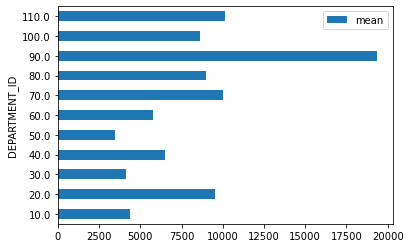

In [82]:
# 부서별 평균 연봉을 수평 그래프로 시각화
import numpy as np
import pandas as pd
b.plot(kind='barh')

[과제] PURPROD 테이블을 불러와서 다음사항을 수행하세요.

데이터프레임으로 출력
- 고객별 2014년 2015년 총구매액 및 평균구매액 출력
- 고객별 2014 VS 2015 총구매액 기준 성장율
